In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 设置绘图风格
plt.style.use('fivethirtyeight')
sns.set_style({'font.sans-serif':['simhei','Arial']})
# 设置中文编码和负号的正常显示
plt.rcParams['font.sans-serif']=['simhei']
plt.rcParams['axes.unicode_minus']=False


In [29]:
"""
数据导入
"""
df = pd.read_csv('第18题附件：国际旅游人数.csv',encoding='gbk')
df.head()

,旅游出发国家,出发国家缩写,旅游到达国家,到达国家缩写,年份,国际旅游人数
0,Afghanistan,AFG,Gabon,GAB,2008,5700
1,Afghanistan,AFG,Cyprus,CYP,2009,8900
2,Afghanistan,AFG,Congo,COG,2010,14700
3,Afghanistan,AFG,Mexico,MEX,2011,16500
4,Afghanistan,AFG,Uganda,UGA,2012,16700


In [30]:
"""
统计每个到达国家的数据有几行
"""
df_group = df.groupby('旅游到达国家').count()
df_group

,旅游出发国家,出发国家缩写,到达国家缩写,年份,国际旅游人数
旅游到达国家,,,,,
Afghanistan,13,13,13,13,13
Albania,26,26,26,26,26
Algeria,16,16,16,16,16
American Samoa,2,2,2,2,2
Andorra,1,1,1,1,1
...,...,...,...,...,...
Viet Nam,18,18,18,18,18
"Virgin Islands, British",21,21,21,21,21
"Virgin Islands, U.S.",26,26,26,26,26


由表可知,df_group可以让我知道这些旅游到达国家的游客来自于几个国家
因为如果你这个国家的游客如果只来自七八个国家,那未免有点毫无作用
所以我用了groupby函数,进行统计

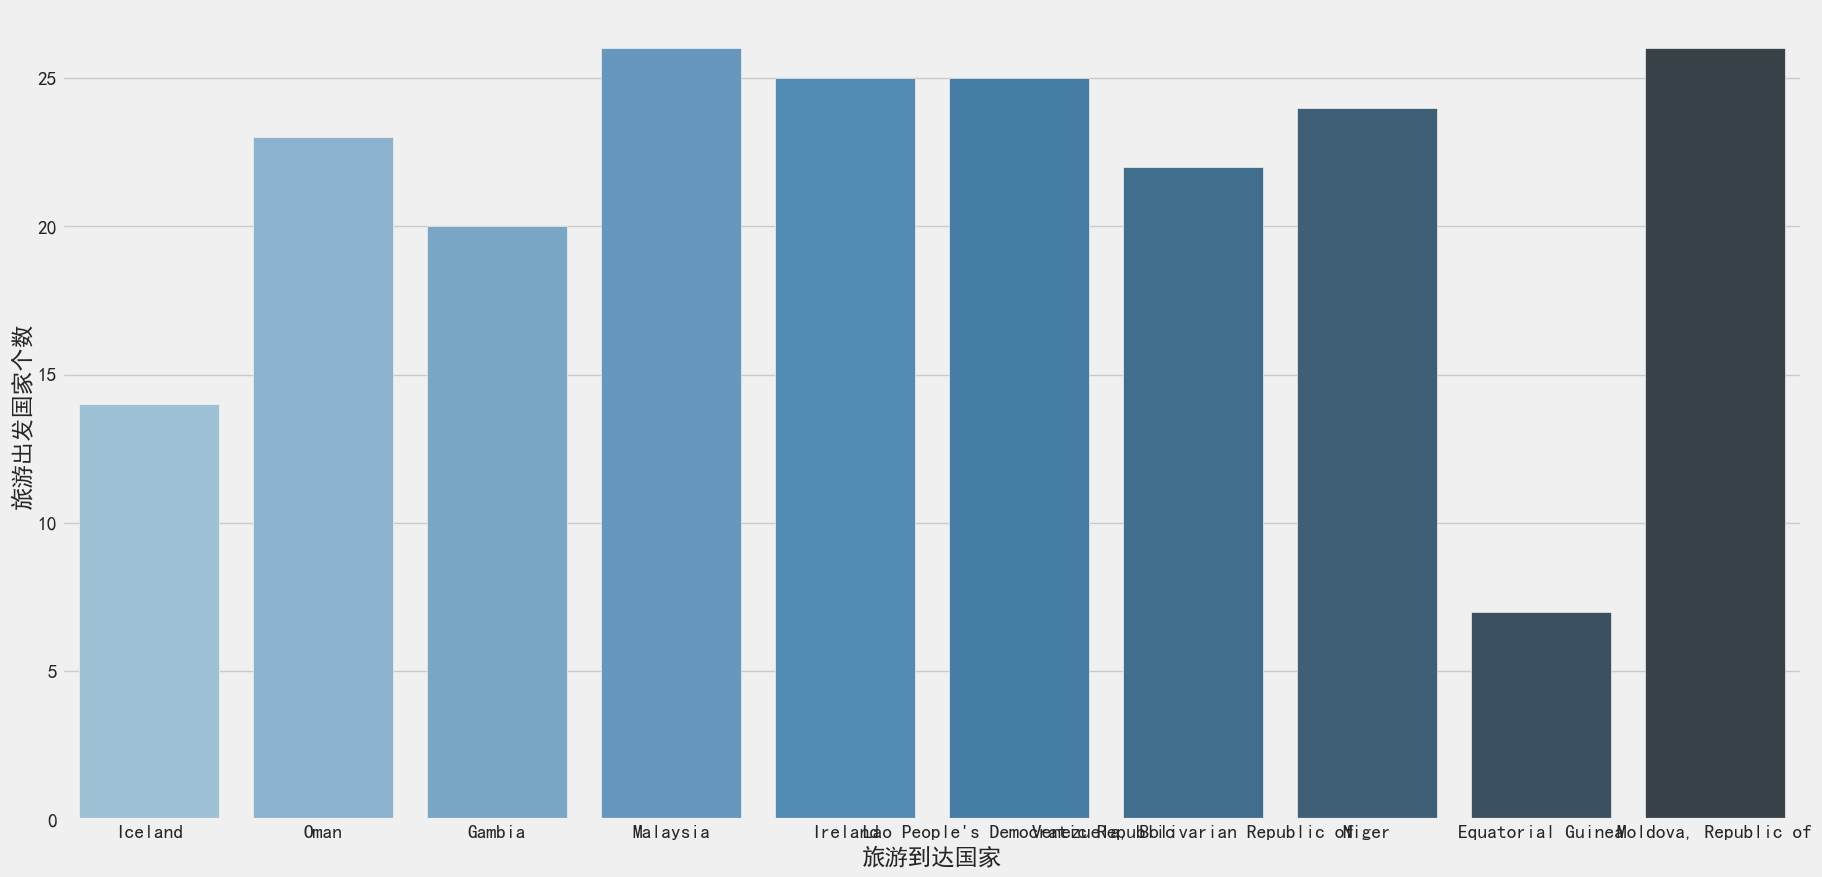

In [31]:
"""
随机选取df_group中的十行数据 进行柱状图
"""
# 随机选取十行数据
df_group_sample = df_group.sample(10)
# 绘制柱状图
plt.figure(figsize=(20,10))
# seaborn绘制柱状图
sns.barplot(x=df_group_sample.index,y=df_group_sample['旅游出发国家'],palette='Blues_d')
plt.xlabel('旅游到达国家')
plt.ylabel('旅游出发国家个数')
plt.show()

由图可知,有些国家为26个输入国家,有些国家为1个输入国家
我们肯定是要保留那些26

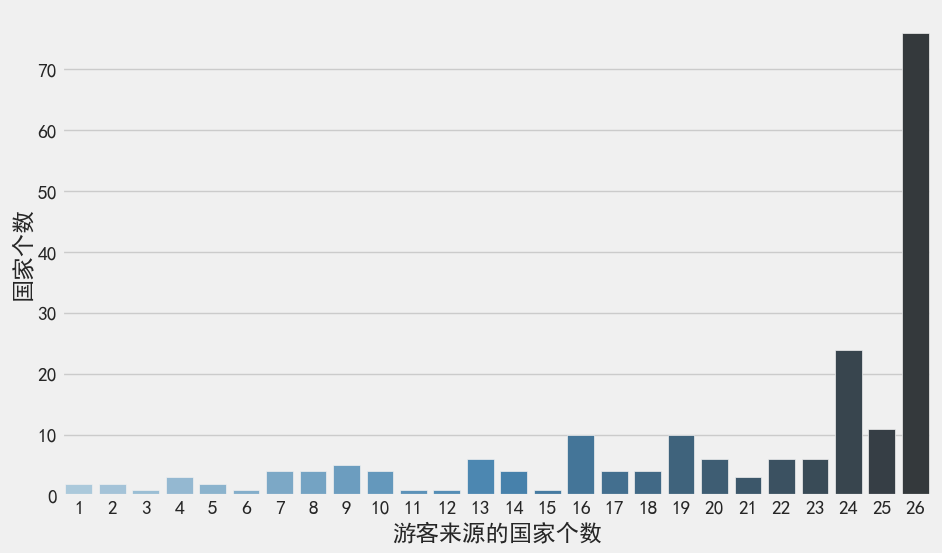

In [32]:
"""
统计df_group中旅游出发国家 为1-26的个数
"""
df_group['旅游出发国家'].value_counts()
# 进行seaborn绘制柱状图
plt.figure(figsize=(10,6))
sns.barplot(x=df_group['旅游出发国家'].value_counts().index,y=df_group['旅游出发国家'].value_counts(),palette='Blues_d')
plt.ylabel('国家个数')
plt.xlabel('游客来源的国家个数')
plt.show()


可以看出大多数都是26

In [33]:
"""
保存旅游出发国家个数为26的索引
然后在df中根据这些索引去选取
"""
df_group_26 = df_group[df_group['旅游出发国家']==26]
# 保存行索引
index_26 = df_group_26.index
index_26

Index(['Albania', 'Angola', 'Argentina', 'Armenia', 'Aruba', 'Australia',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Belarus', 'Bhutan',
       'Bolivia, Plurinational State of', 'Botswana', 'Brazil', 'Bulgaria',
       'C?te d'Ivoire', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Chile',
       'Colombia', 'Costa Rica', 'Cuba', 'Cura?ao', 'Cyprus', 'Ecuador',
       'Egypt', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'Ghana',
       'Guatemala', 'Honduras', 'Hungary', 'Israel', 'Japan', 'Jordan',
       'Kazakhstan', 'Korea, Republic of', 'Kuwait', 'Madagascar', 'Malawi',
       'Malaysia', 'Mauritius', 'Mexico', 'Moldova, Republic of', 'Mongolia',
       'Morocco', 'Nepal', 'Nigeria', 'Norway', 'Pakistan', 'Panama',
       'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Puerto Rico',
       'Romania', 'Seychelles', 'Slovakia', 'Slovenia', 'Solomon Islands',
       'South Africa', 'Sri Lanka', 'Suriname', 'Switzerland', 'Thailand',
       'Trinidad and Tobago', 'Tunisia', 'United

保留这些26的索引,在df中进行选取

In [34]:
"""
根据索引选取df中数据
"""
df_RJ26 = df[df['旅游到达国家'].isin(index_26)]
df_RJ26

,旅游出发国家,出发国家缩写,旅游到达国家,到达国家缩写,年份,国际旅游人数
1,Afghanistan,AFG,Cyprus,CYP,2009,8900
3,Afghanistan,AFG,Mexico,MEX,2011,16500
5,Afghanistan,AFG,United Arab Emirates,ARE,2013,17900
6,Afghanistan,AFG,Albania,ALB,2014,12100
7,Afghanistan,AFG,Belarus,BLR,2015,8600
...,...,...,...,...,...,...
4108,Zimbabwe,ZWE,Norway,NOR,2005,9900
4114,Zimbabwe,ZWE,"Korea, Republic of",KOR,2011,16400
4116,Zimbabwe,ZWE,Sri Lanka,LKA,2013,18300
4119,Zimbabwe,ZWE,Norway,NOR,2016,19400


In [35]:
"""
遍历索引中的每一个到达国家,打印国际旅游人数最多的那一行对应的旅游出发国家
"""
list_26 = []
for i in index_26:
    # 选取每一个到达国家的数据
    df_RJ26_1 = df_RJ26[df_RJ26['旅游到达国家']==i]
    # 找到国际旅游人数最多的那一行
    df_RJ26_2 = df_RJ26_1[df_RJ26_1['国际旅游人数']==df_RJ26_1['国际旅游人数'].max()]
    # 打印国际旅游人数最多的那一行对应的旅游出发国家
    print(df_RJ26_2['旅游出发国家'].values[0])
    # 添加到一个列表中
    list_26.append(df_RJ26_2['旅游出发国家'].values[0])


United States
Malaysia
Turkey
United States
France
Germany
United States
Germany
Portugal
Italy
Thailand
Malaysia
China
France
Poland
Germany
Netherlands
South Africa
Portugal
Austria
Germany
India
Malaysia
United States
Malaysia
Australia
France
France
Canada
France
Japan
Canada
Australia
Australia
Egypt
France
United States
United States
Thailand
Germany
China
Italy
Korea, Republic of
United Arab Emirates
United States
China
Mexico
Turkey
Mexico
Greece
France
South Africa
Germany
United Kingdom
Switzerland
France
China
United States
Germany
France
Australia
Canada
France
Australia
India
China
Switzerland
India
Thailand
Australia
Greece
China
Mexico
Germany
Sweden
Italy


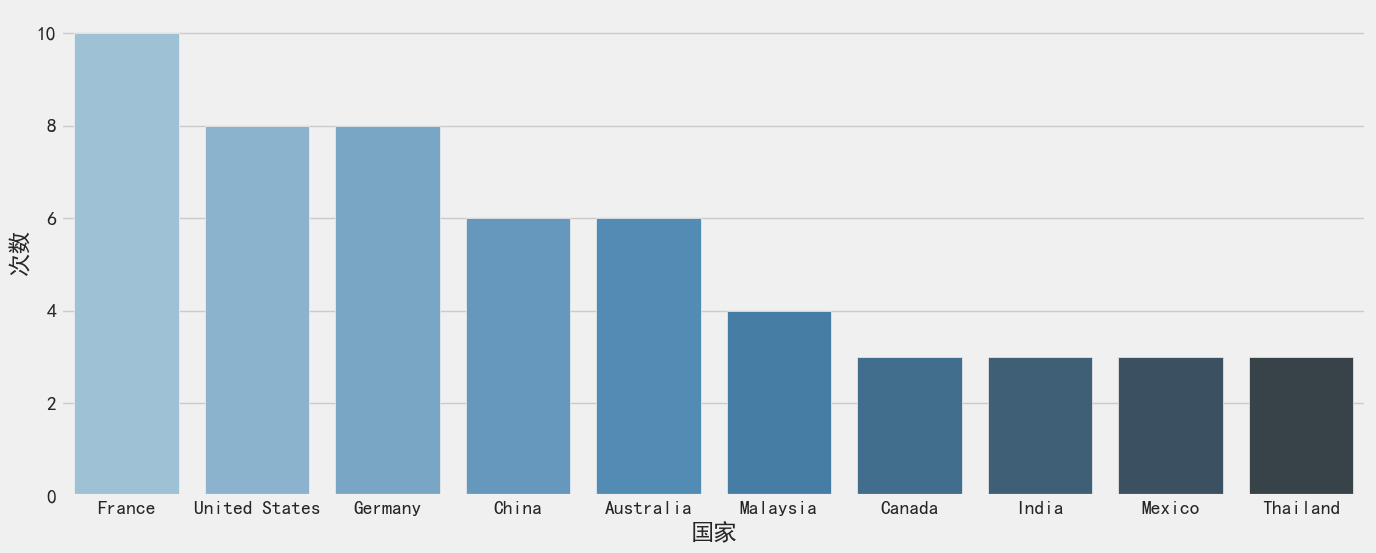

In [212]:
"""
统计list_26中每个国家出现的次数
"""
# 统计每个国家出现的次数
df_list_26 = pd.DataFrame(list_26,columns=['国家'])
df_list_26['国家'].value_counts()
#绘图,选取前10个国家
plt.figure(figsize=(15,6))
sns.barplot(x=df_list_26['国家'].value_counts().index[:10],y=df_list_26['国家'].value_counts()[:10],palette='Blues_d')
plt.xlabel('国家')
plt.ylabel('次数')

plt.show()


这个图的含义应该是表示每个国家的旅游热爱度
比如法国在各个国家里面去的人数占比最多的次数最多
就可以认为法国去国外旅游种类更加丰富

In [37]:
"""
按照旅游出发国家进行分组
"""
df_group_new = df.groupby('旅游出发国家').count()
df_group_new

,出发国家缩写,旅游到达国家,到达国家缩写,年份,国际旅游人数
旅游出发国家,,,,,
Afghanistan,13,13,13,13,13
Albania,26,26,26,26,26
Algeria,16,16,16,16,16
American Samoa,2,2,2,2,2
Andorra,1,1,1,1,1
...,...,...,...,...,...
Viet Nam,18,18,18,18,18
"Virgin Islands, British",21,21,21,21,21
"Virgin Islands, U.S.",26,26,26,26,26


In [38]:
"""
统计每个旅游出发国家的个数
"""
df_group_new['旅游到达国家'].value_counts()
# 筛选出旅游出发国家个数为26的索引
index_new = df_group_new[df_group_new['旅游到达国家']==26].index
# 选取df中旅游出发国家个数为26的数据
df_new = df[df['旅游出发国家'].isin(index_new)]
df_new

,旅游出发国家,出发国家缩写,旅游到达国家,到达国家缩写,年份,国际旅游人数
13,Albania,ALB,Vanuatu,VUT,1995,7000
14,Albania,ALB,Latvia,LVA,1996,9400
15,Albania,ALB,Georgia,GEO,1997,3400
16,Albania,ALB,Panama,PAN,1998,6000
17,Albania,ALB,Paraguay,PRY,1999,21800
...,...,...,...,...,...,...
4119,Zimbabwe,ZWE,Norway,NOR,2016,19400
4120,Zimbabwe,ZWE,Kuwait,KWT,2017,15800
4121,Zimbabwe,ZWE,Latvia,LVA,2018,19100
4122,Zimbabwe,ZWE,Maldives,MDV,2019,28500


In [39]:
"""
导入新数据进行分析
"""
data_RJ = pd.read_excel('入境(1).xlsx',index_col=0)
# 读取前27行
data_RJ = data_RJ.iloc[:26,:]
data_RJ

,阿鲁巴,安哥拉,阿尔巴尼亚,安道尔共和国,阿根廷,亚美尼亚,美属萨摩亚,安提瓜和巴布达,澳大利亚,奥地利,...,圣文森特和格林纳丁斯,委内瑞拉玻利瓦尔共和国,英屬維爾京群島,美属维京群岛,越南,瓦努阿图,世界,南非,赞比亚,津巴布韦
1995.0,9.120000e+05,9000.0,304000.0,3146000.0,2.289000e+06,12000.0,34000.000000,447000.0,3726000.0,17173000.0,...,218000.000000,8.790000e+05,219000.000000,1741000.0,1351000.0,82000.000000,1.082522e+09,4.684000e+06,163000.0,1416000.0
1996.0,9.570000e+05,21000.0,287000.0,4715000.0,2.614000e+06,13000.0,35000.000000,498000.0,4165000.0,17090000.0,...,216000.000000,9.600000e+05,244000.000000,1779000.0,1607000.0,103000.000000,1.143489e+09,5.186000e+06,264000.0,1597000.0
1997.0,9.470000e+05,45000.0,119000.0,6284000.0,2.764000e+06,23000.0,26000.000000,526000.0,4318000.0,16647000.0,...,200000.000000,9.330000e+05,244000.000000,2128000.0,1716000.0,81000.000000,1.193996e+09,5.170000e+06,341000.0,1336000.0
1998.0,9.060000e+05,52000.0,184000.0,7853000.0,3.012000e+06,32000.0,36000.000000,570000.0,4167000.0,17352000.0,...,202000.000000,8.130000e+05,279000.000000,2139000.0,1520000.0,78000.000000,1.209957e+09,5.898000e+06,362000.0,2090000.0
1999.0,9.720000e+05,45000.0,371000.0,9422000.0,2.898000e+06,41000.0,41000.000000,560000.0,4459000.0,17467000.0,...,223000.000000,7.020000e+05,284000.000000,1964000.0,1782000.0,96000.000000,1.254467e+09,6.026000e+06,404000.0,2250000.0
2000.0,1.211000e+06,51000.0,317000.0,10991000.0,2.909000e+06,45000.0,44000.000000,634000.0,4931000.0,17982000.0,...,256000.000000,6.020000e+05,272000.000000,2396000.0,2140000.0,106000.000000,1.332379e+09,6.001000e+06,457000.0,1967000.0
2001.0,1.178000e+06,67000.0,354000.0,11351000.0,2.620000e+06,123000.0,36000.000000,624000.0,4856000.0,18180000.0,...,254000.000000,7.920000e+05,296000.000000,2497000.0,2330000.0,106000.000000,1.299005e+09,5.908000e+06,492000.0,2217000.0
2002.0,1.225000e+06,91000.0,470000.0,11507000.0,2.820000e+06,162000.0,35333.333333,528000.0,4841000.0,18611000.0,...,247000.000000,5.900000e+05,282000.000000,2337000.0,2628000.0,99000.000000,1.319582e+09,6.550000e+06,565000.0,2041000.0
2003.0,1.184000e+06,107000.0,557000.0,11601000.0,2.995000e+06,206000.0,32833.333333,623000.0,4746000.0,19078000.0,...,242000.000000,4.350000e+05,278000.000000,2395000.0,2429000.0,102000.000000,1.300067e+09,6.640000e+06,413000.0,2256000.0
2004.0,1.304000e+06,194000.0,645000.0,11668000.0,3.457000e+06,263000.0,30333.333333,769000.0,5215000.0,19374000.0,...,262000.000000,6.180000e+05,304000.000000,2620000.0,2928000.0,99000.000000,1.436450e+09,6.815000e+06,515000.0,1854000.0


In [40]:
data_CJ = pd.read_excel('出境(1).xlsx',index_col=0)
# 读取前27行
data_CJ = data_CJ.iloc[:26,:]
data_CJ

,亚美尼亚,澳大利亚,奥地利,阿塞拜疆,比利时,保加利亚,白俄罗斯,玻利维亚,巴西,中歐和波羅的海,...,土耳其,中高等收入国家,乌拉圭,美国,乌兹别克斯坦,委内瑞拉玻利瓦尔共和国,瓦努阿图,世界,萨摩亚,津巴布韦
1995.0,5.733333e+04,2519000.0,6975800.0,251000.0,6031400.0,3524000.0,866600.0,249000.0,2.600000e+06,8.213741e+07,...,3981000.0,1.733246e+08,511600.000,7.403100e+07,2.976667e+05,5.340000e+05,11000.000000,7.961075e+08,68000.0,2.560000e+05
1996.0,6.733333e+04,2732000.0,7147800.0,432000.0,5645000.0,3006000.0,1553000.0,269000.0,3.797000e+06,9.079713e+07,...,4261000.0,1.688569e+08,555500.000,7.680300e+07,2.756667e+05,5.110000e+05,11000.000000,8.599194e+08,66000.0,6.900000e+04
1997.0,7.733333e+04,2933000.0,7319800.0,654000.0,7548000.0,3059000.0,2239400.0,285000.0,4.014000e+06,9.699563e+07,...,4633000.0,1.764819e+08,562000.000,7.848100e+07,2.460000e+05,4.600000e+05,11000.000000,9.300660e+08,64000.0,1.230000e+05
1998.0,8.733333e+04,3161000.0,7491800.0,1146000.0,7776000.0,2592000.0,2925800.0,299000.0,4.171000e+06,9.854064e+07,...,4601000.0,1.803659e+08,654000.000,8.275800e+07,2.470000e+05,7.520000e+05,12000.000000,9.821260e+08,62000.0,2.130000e+05
1999.0,9.733333e+04,3210000.0,7663800.0,1204000.0,6410000.0,2376000.0,3612200.0,253000.0,2.863000e+06,1.033589e+08,...,4758000.0,1.917431e+08,778000.000,8.454000e+07,2.020000e+05,7.540000e+05,12000.000000,1.043185e+09,58000.0,3.310000e+05
2000.0,1.110000e+05,3498000.0,7528000.0,1326000.0,7932000.0,2337000.0,4747000.0,201000.0,3.228000e+06,1.065992e+08,...,5284000.0,2.149865e+08,667000.000,8.797300e+07,2.170000e+05,9.540000e+05,12000.000000,1.122419e+09,61000.0,2.766667e+05
2001.0,1.100000e+05,3443000.0,8350000.0,1130000.0,6570000.0,2730000.0,4008000.0,222000.0,2.674000e+06,1.025376e+08,...,4856000.0,2.177183e+08,531000.000,8.475500e+07,1.830000e+05,9.330000e+05,11000.000000,1.121399e+09,56000.0,3.206667e+05
2002.0,1.310000e+05,3461000.0,8266000.0,1141000.0,6773000.0,3188000.0,6160000.0,217000.0,2.338000e+06,9.374082e+07,...,5131000.0,2.212518e+08,530000.000,8.088300e+07,2.640000e+05,8.810000e+05,11000.000000,1.127809e+09,53000.0,3.646667e+05
2003.0,1.690000e+05,3388000.0,8384000.0,1475000.0,7268000.0,3403000.0,6518000.0,304000.0,3.229000e+06,8.868526e+07,...,5928000.0,2.289835e+08,495000.000,7.588000e+07,4.000000e+05,8.320000e+05,12000.000000,1.130457e+09,51000.0,3.860000e+05
2004.0,2.210000e+05,4369000.0,8371000.0,1473000.0,8783000.0,3882000.0,6924000.0,346000.0,2.968000e+06,9.153398e+07,...,7299000.0,2.500022e+08,569000.000,7.965500e+07,4.550000e+05,8.160000e+05,13000.000000,1.201164e+09,54000.0,4.980000e+05


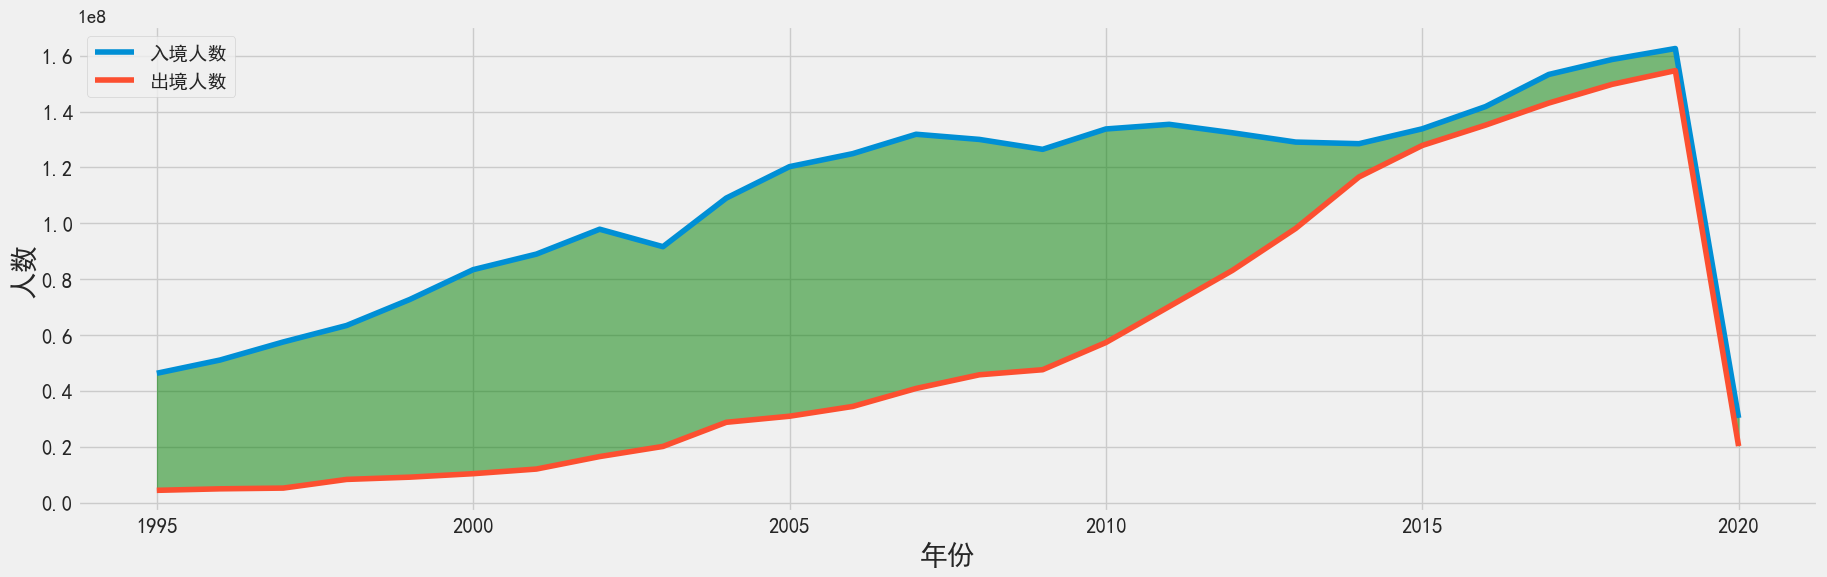

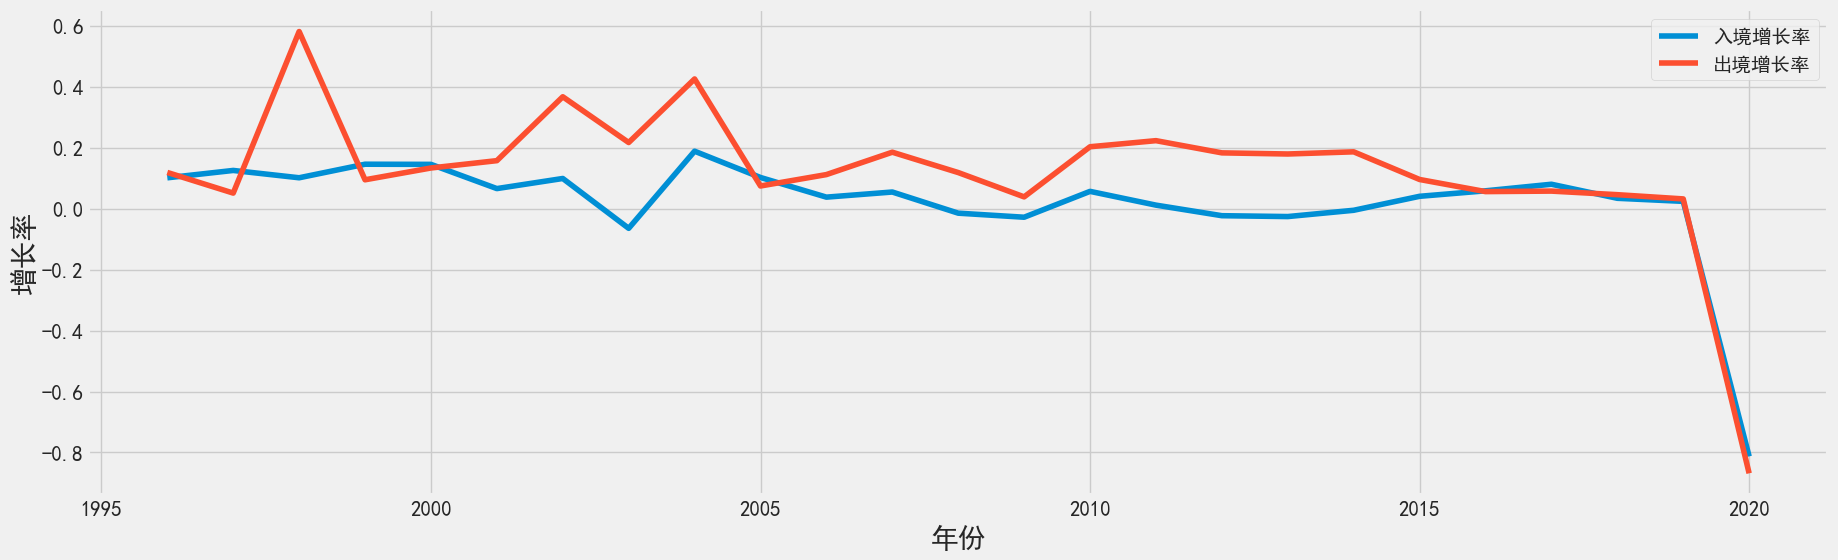

In [44]:
"""
绘制中国入境和出境人数折线图
"""
# 用seaborn画两条折线图
plt.figure(figsize=(20,6))
sns.lineplot(x=data_RJ.index,y=data_RJ['中国'],label='入境人数')
sns.lineplot(x=data_CJ.index,y=data_CJ['中国'],label='出境人数')
# 计算两条曲线的差值
plt.fill_between(data_RJ.index,data_RJ['中国'],data_CJ['中国'],color='green',alpha=0.5)
plt.xlabel('年份',fontdict={'size':20})
plt.ylabel('人数',fontdict={'size':20})
# 将刻度值放大
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()
# 入境增长率等于后一年除以前一年减1
data_RJ['中国'].pct_change()
# 出境增长率等于后一年除以前一年减1
data_CJ['中国'].pct_change()
# 绘图
plt.figure(figsize=(20,6))
sns.lineplot(x=data_RJ.index,y=data_RJ['中国'].pct_change(),label='入境增长率')
sns.lineplot(x=data_CJ.index,y=data_CJ['中国'].pct_change(),label='出境增长率')
plt.xlabel('年份',fontdict={'size':20})
plt.ylabel('增长率',fontdict={'size':20})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()


从图中可以看出,中国的入境和出境人数都在逐年增长,但是入境人数显然要比出境人数多很多,随着中国经济的增长以及对外开放程度不断提高,中国的出境人数增长迅速
在2015年左右甚至一度接近入境人数,但是在2016年之后,中国的出境人数增长速度放缓,而入境人数增长速度加快,这可能是因为中国经济增长速度放缓,人民币汇率贬值,导致出境人数增长放缓,而入境人数增长加快

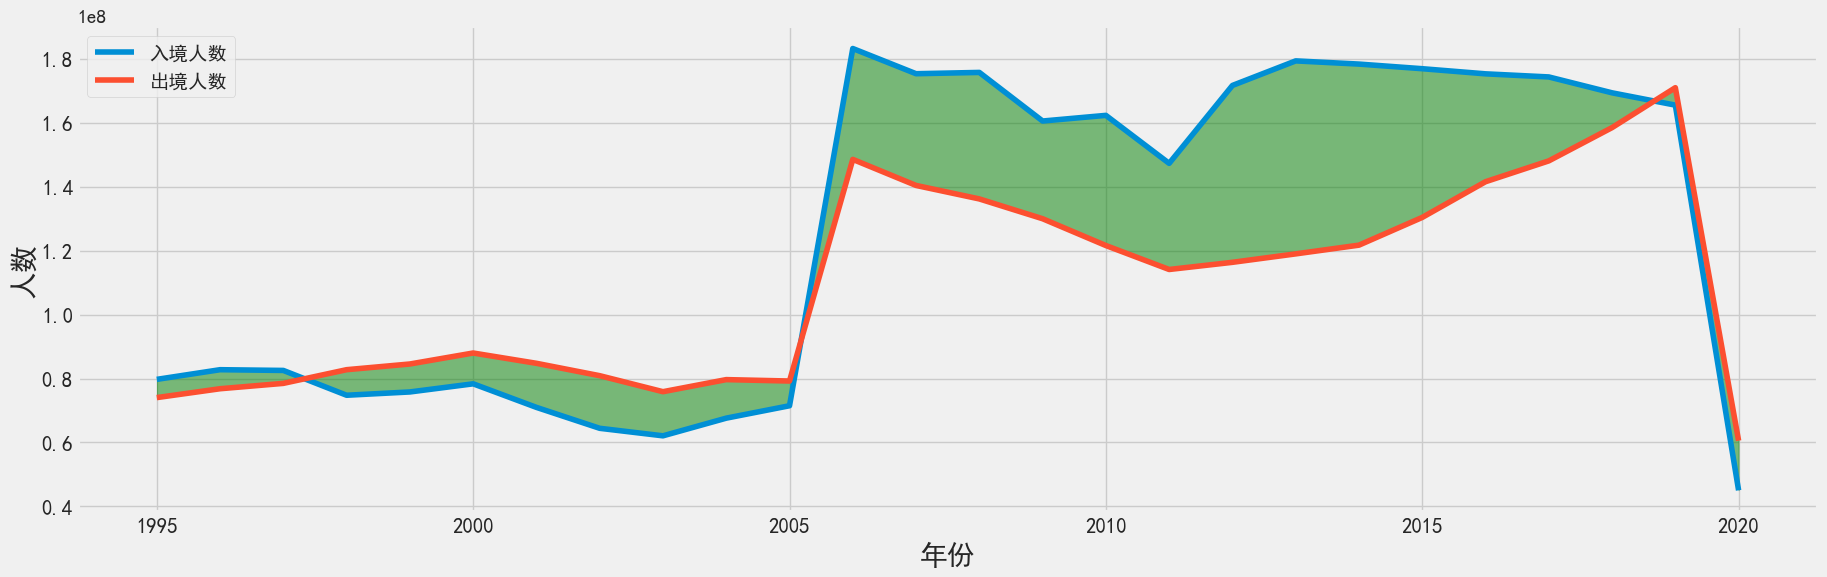

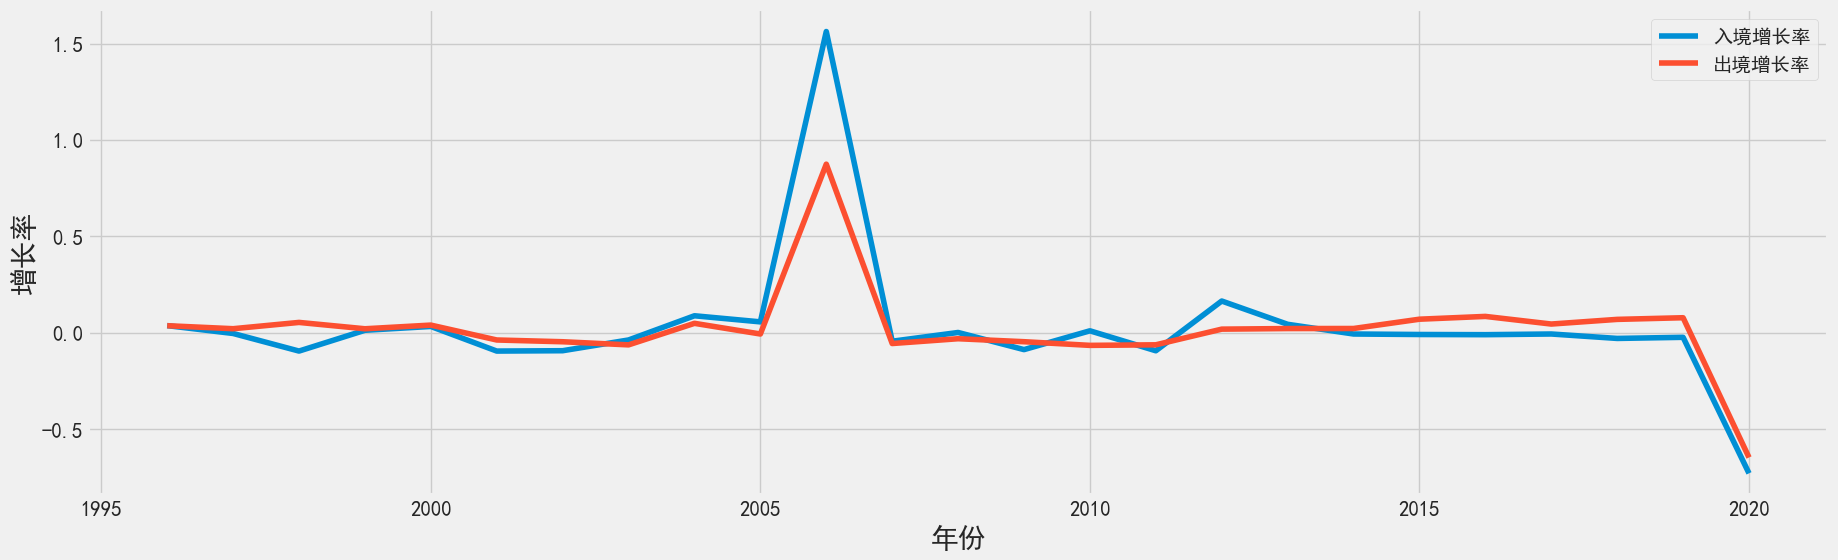

In [48]:
"""
绘制美国入境和出境人数折线图
"""
# 用seaborn画两条折线图
plt.figure(figsize=(20,6))
sns.lineplot(x=data_RJ.index,y=data_RJ['美国'],label='入境人数')
sns.lineplot(x=data_CJ.index,y=data_CJ['美国'],label='出境人数')
plt.xlabel('年份',fontdict={'size':20} )
plt.ylabel('人数',fontdict={'size':20} )
# 计算两条曲线的差值
plt.fill_between(data_RJ.index,data_RJ['美国'],data_CJ['美国'],color='green',alpha=0.5)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()
# 绘制增长率折线图
plt.figure(figsize=(20,6))
sns.lineplot(x=data_RJ.index,y=data_RJ['美国'].pct_change(),label='入境增长率')
sns.lineplot(x=data_CJ.index,y=data_CJ['美国'].pct_change(),label='出境增长率')
plt.xlabel('年份',fontdict={'size':20})
plt.ylabel('增长率',fontdict={'size':20})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()


由图可以看出,美国的入境人数和出境人数很接近,但是增长率一直在一个很小的值,但是在2006年美国的入境人数和出境人数骤增,这可能是因为2006年美国实施了《美国旅游促进法》,这个法案的主要内容是为了促进美国旅游业的发展,提高美国的国际形象,吸引更多的外国游客,所以在2006年美国的入境人数和出境人数都有了很大的增长

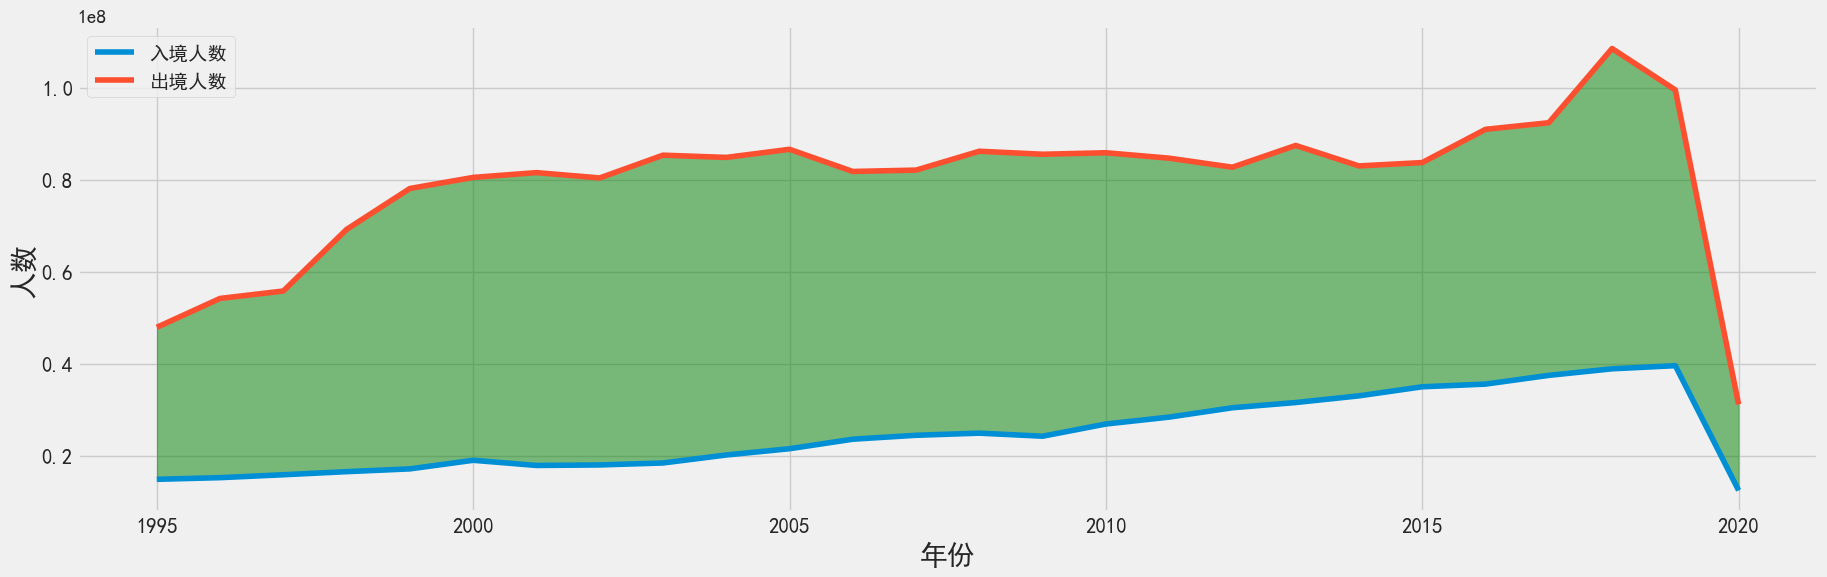

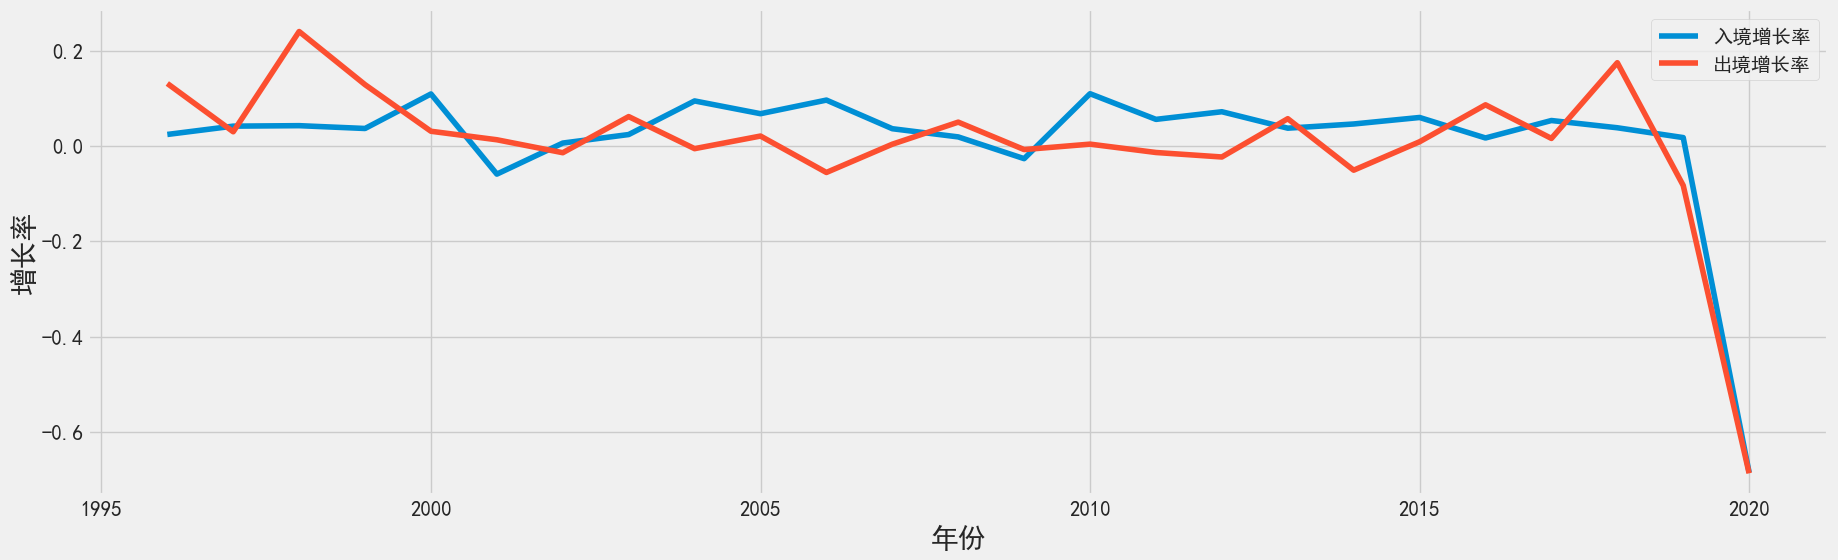

In [46]:
"""
绘制德国入境和出境人数折线图
"""
# 用seaborn画两条折线图
plt.figure(figsize=(20,6))
sns.lineplot(x=data_RJ.index,y=data_RJ['德国'],label='入境人数')
sns.lineplot(x=data_CJ.index,y=data_CJ['德国'],label='出境人数')
# 计算两条曲线的差值
plt.fill_between(data_RJ.index,data_RJ['德国'],data_CJ['德国'],color='green',alpha=0.5)
plt.xlabel('年份',fontdict={'size':20})
plt.ylabel('人数',fontdict={'size':20})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()
# 绘制增长率折线图
plt.figure(figsize=(20,6))
sns.lineplot(x=data_RJ.index,y=data_RJ['德国'].pct_change(),label='入境增长率')
sns.lineplot(x=data_CJ.index,y=data_CJ['德国'].pct_change(),label='出境增长率')
plt.xlabel('年份',fontdict={'size':20})
plt.ylabel('增长率',fontdict={'size':20})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()


由图可以看出,德国的出境人数明显多于入境人数,但是两者的增长率都在一个很小的值,,可知德国并不是一个旅游大国,并且2020下滑

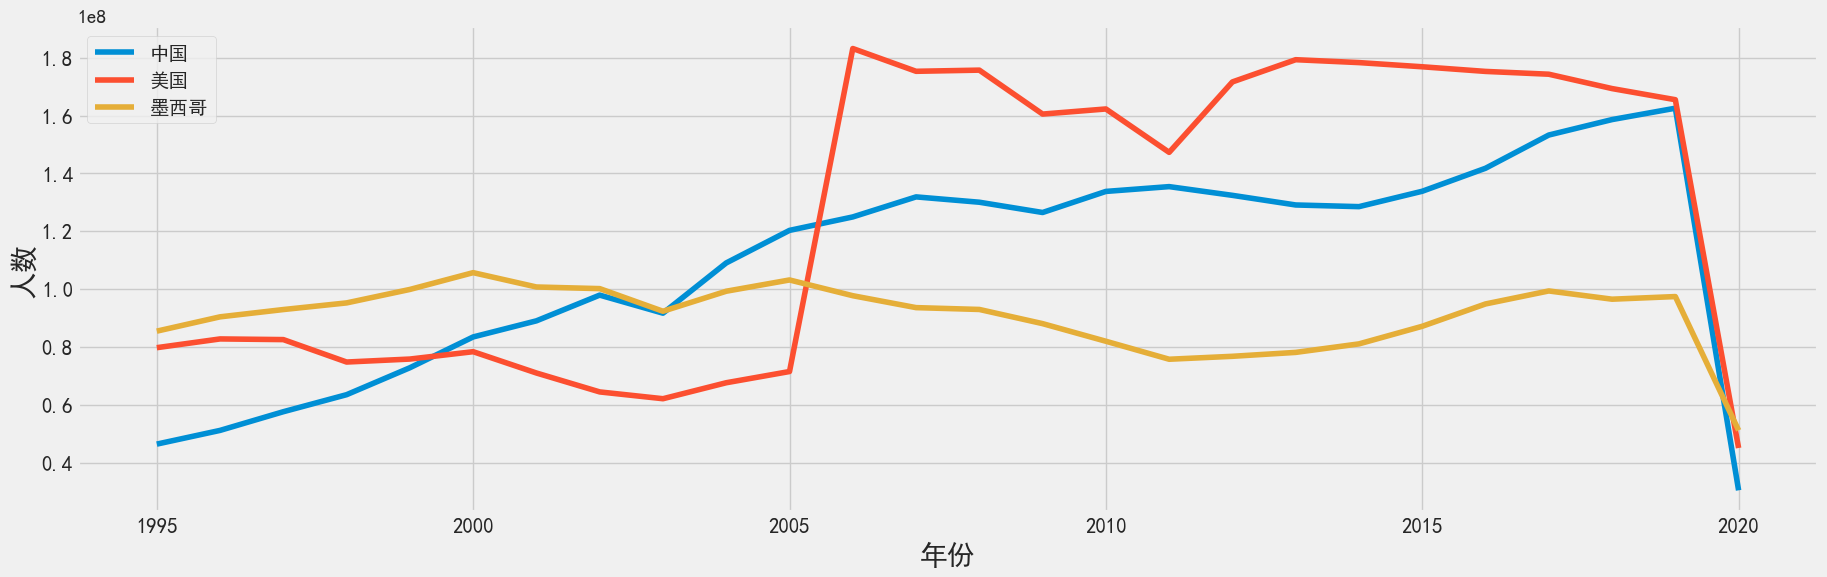

In [160]:
"""
分析中美法三国的入境人数
"""
# 用seaborn画三条折线图
plt.figure(figsize=(20,6))
sns.lineplot(x=data_RJ.index,y=data_RJ['中国'],label='中国')
sns.lineplot(x=data_RJ.index,y=data_RJ['美国'],label='美国')
sns.lineplot(x=data_RJ.index,y=data_RJ['墨西哥'],label='墨西哥')
plt.xlabel('年份',fontdict={'size':20})
plt.ylabel('人数',fontdict={'size':20})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()


由图可知,在2006年之前三国的入境人数差距并不大,墨西哥保持平稳,美国小幅度下滑,中国持续增长.
2006年之后美国大幅增长随后下滑,中国增长幅度也减小但依然上升

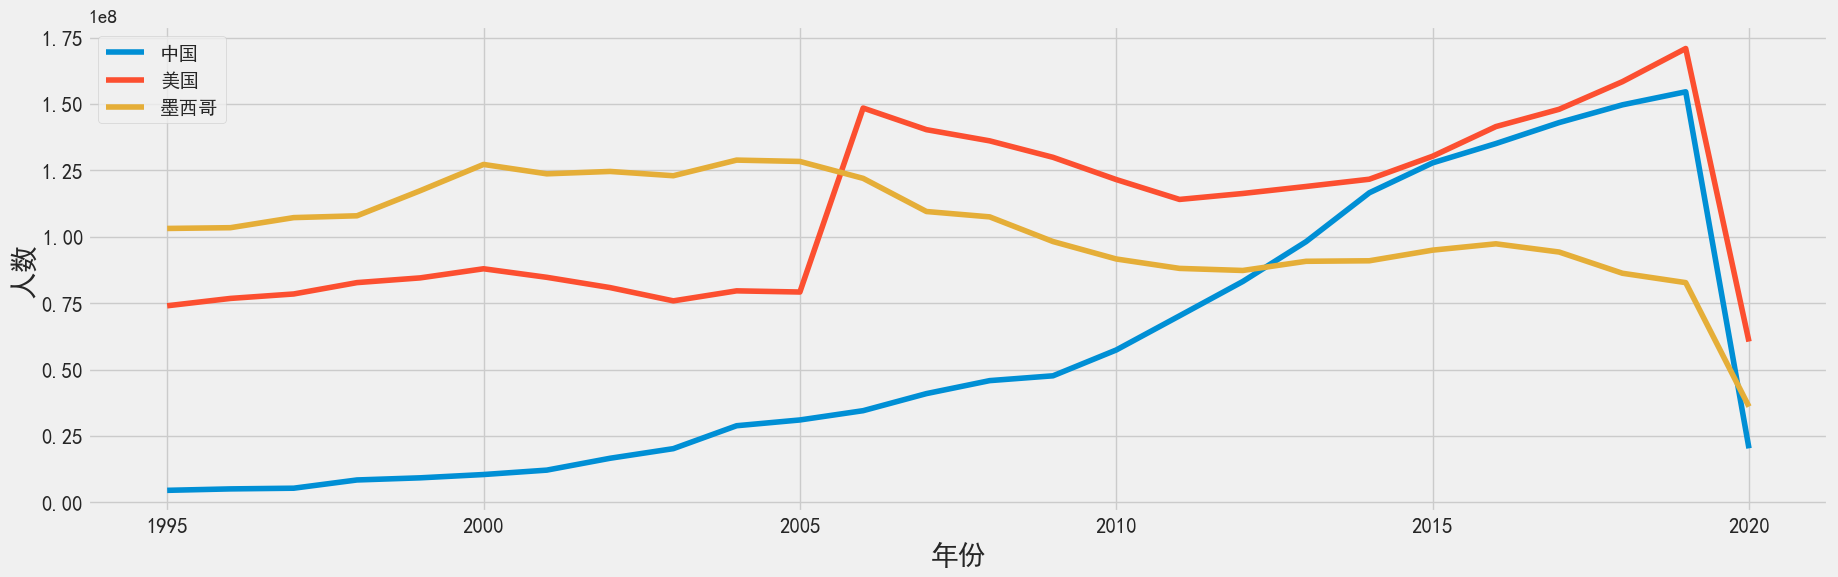

In [162]:
"""
分析中美墨西哥三国的出境人数
"""
# 用seaborn画三条折线图
plt.figure(figsize=(20,6))
sns.lineplot(x=data_CJ.index,y=data_CJ['中国'],label='中国')
sns.lineplot(x=data_CJ.index,y=data_CJ['美国'],label='美国')
sns.lineplot(x=data_CJ.index,y=data_CJ['墨西哥'],label='墨西哥')
plt.xlabel('年份',fontdict={'size':20})
plt.ylabel('人数',fontdict={'size':20})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()


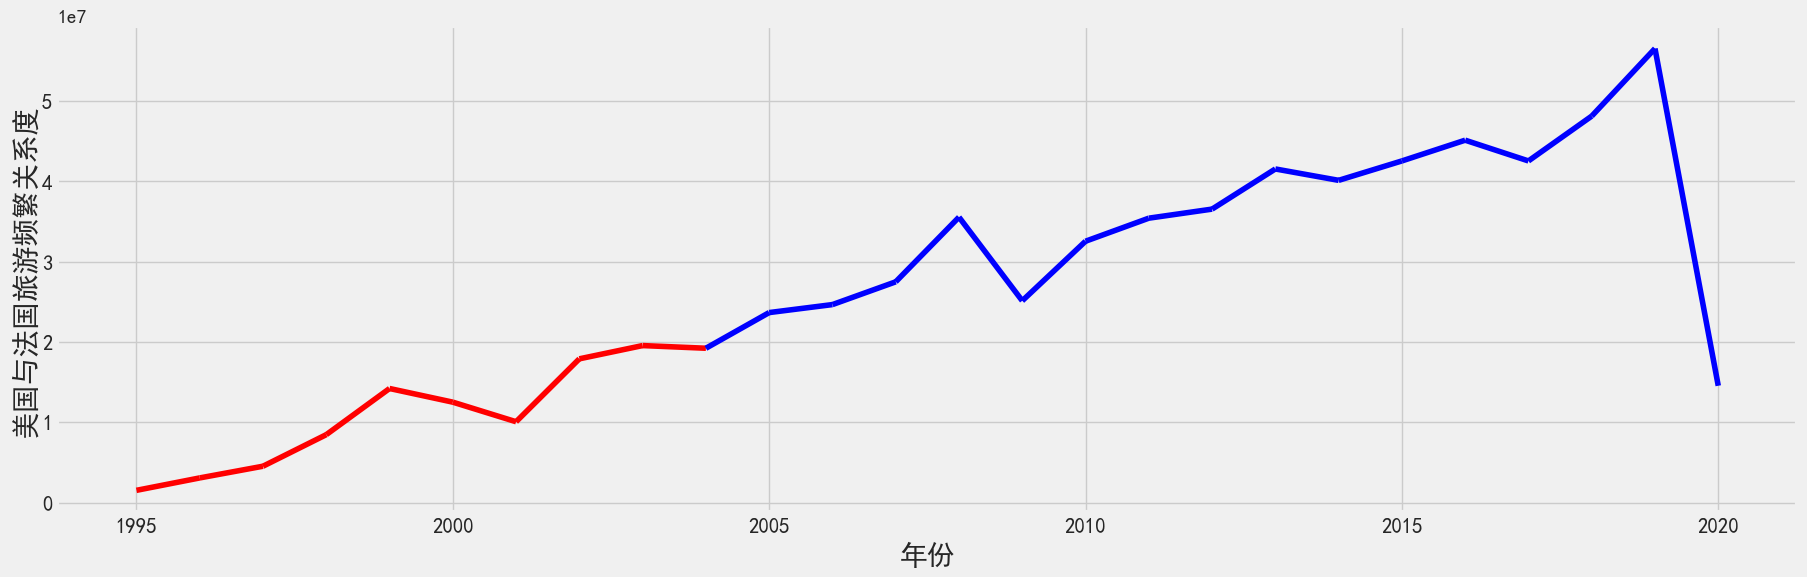

In [200]:
"""
绘制美国和法国的旅游人数变化
"""
# x表示1995-2020
x = np.arange(1995,2021)
# y表示双方旅游人数
y = [1518000,3064520,4521630,8451600,14200000,12500000,10062000,17895120,19546210,19214520,23656451,24651321,27486512,35541236,25124512,32541236,35412541,36541236,41541236,40124512,42541236,45124512,42541236,48124512,56541236,14541236]

# seaborn绘制折线图
plt.figure(figsize=(20,6))
# 当x小于2000适合,线条颜色为红色,大于2000时为蓝色
for i in range(len(x)):
    if x[i] < 2004:
        sns.lineplot(x=x[i:i+2],y=y[i:i+2],color='red')
    else:
        sns.lineplot(x=x[i:i+2],y=y[i:i+2],color='blue')
# sns.lineplot(x=x,y=y1)
plt.xlabel('年份',fontdict={'size':20})
plt.ylabel('美国与法国旅游频繁关系度',fontdict={'size':20})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()



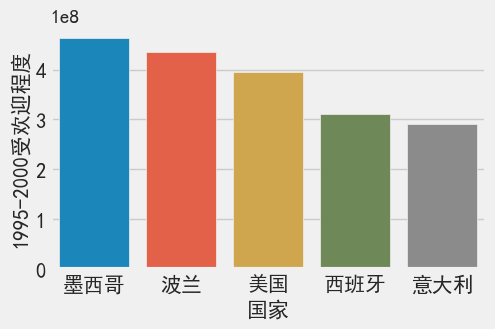

In [207]:
"""
统计第一行到第五行的数据之和
"""
# 选取入境数据第一行到第五行的数据
data = data_RJ.iloc[0:5,:]
# 对数据进行求和并选取前五名
data.sum(axis=0).sort_values(ascending=False).head(5)
# 绘制柱状图
plt.figure(figsize=(5,3))
sns.barplot(x=data.sum(axis=0).sort_values(ascending=False).head(5).index,y=data.sum(axis=0).sort_values(ascending=False).head(5).values)
plt.xlabel('国家',fontdict={'size':15})
plt.ylabel('1995-2000受欢迎程度',fontdict={'size':15})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()


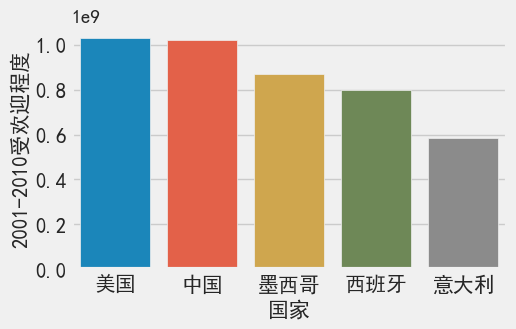

In [206]:
"""
统计第一行到第五行的数据之和
"""
# 选取入境数据第一行到第五行的数据
data = data_RJ.iloc[6:15,:]
# 对数据进行求和并选取前五名
data.sum(axis=0).sort_values(ascending=False).head(5)
# 绘制柱状图
plt.figure(figsize=(5,3))
sns.barplot(x=data.sum(axis=0).sort_values(ascending=False).head(5).index,y=data.sum(axis=0).sort_values(ascending=False).head(5).values)
plt.xlabel('国家',fontdict={'size':15})
plt.ylabel('2001-2010受欢迎程度',fontdict={'size':15})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

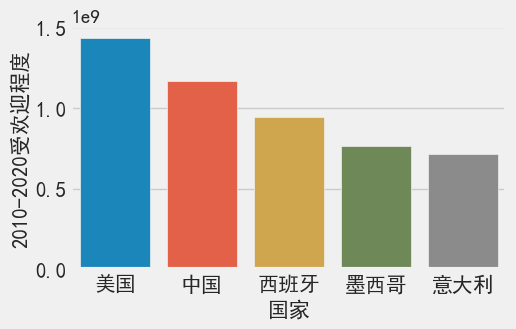

In [205]:
"""
统计第一行到第五行的数据之和
"""
# 选取入境数据第一行到第五行的数据
data = data_RJ.iloc[17:26,:]
# 对数据进行求和并选取前五名
data.sum(axis=0).sort_values(ascending=False).head(5)
# 绘制柱状图
plt.figure(figsize=(5,3))
sns.barplot(x=data.sum(axis=0).sort_values(ascending=False).head(5).index,y=data.sum(axis=0).sort_values(ascending=False).head(5).values)
plt.xlabel('国家',fontdict={'size':15})
plt.ylabel('2010-2020受欢迎程度',fontdict={'size':15})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

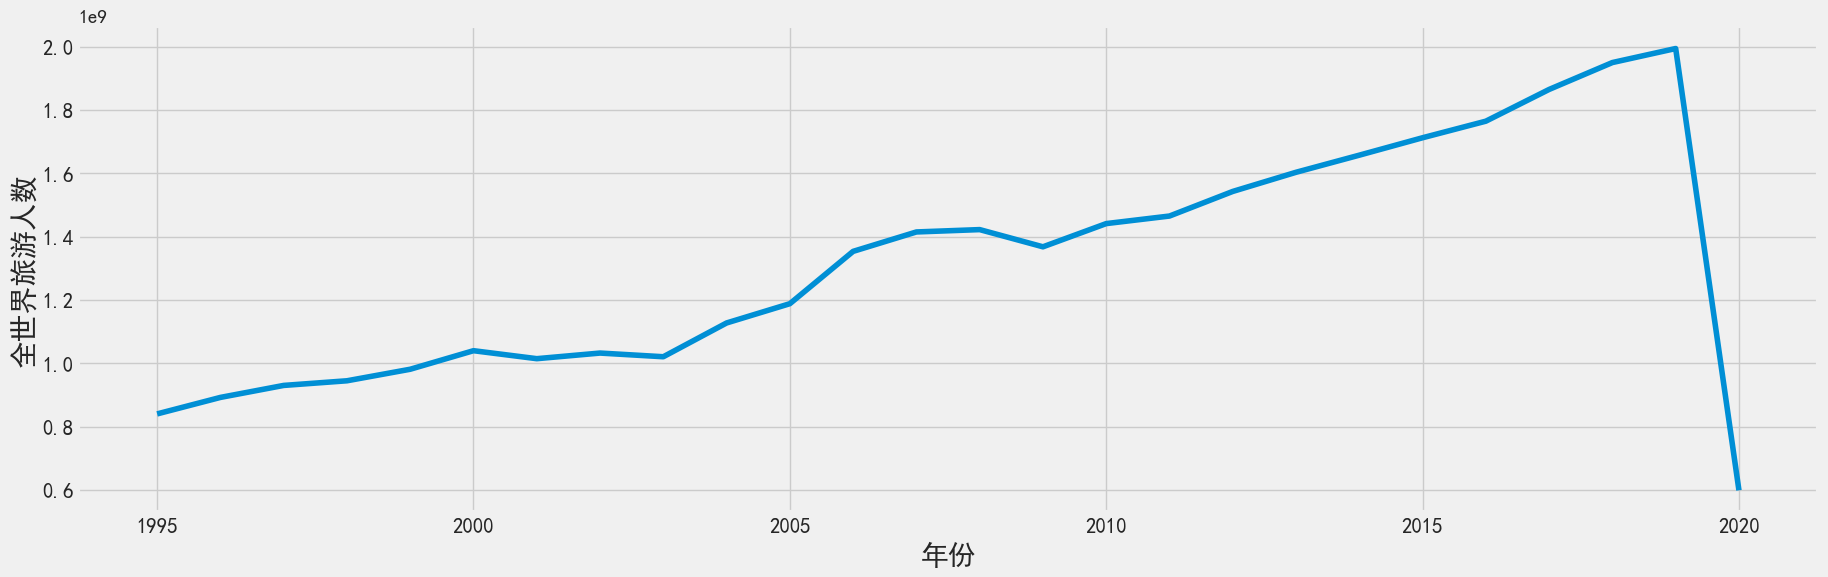

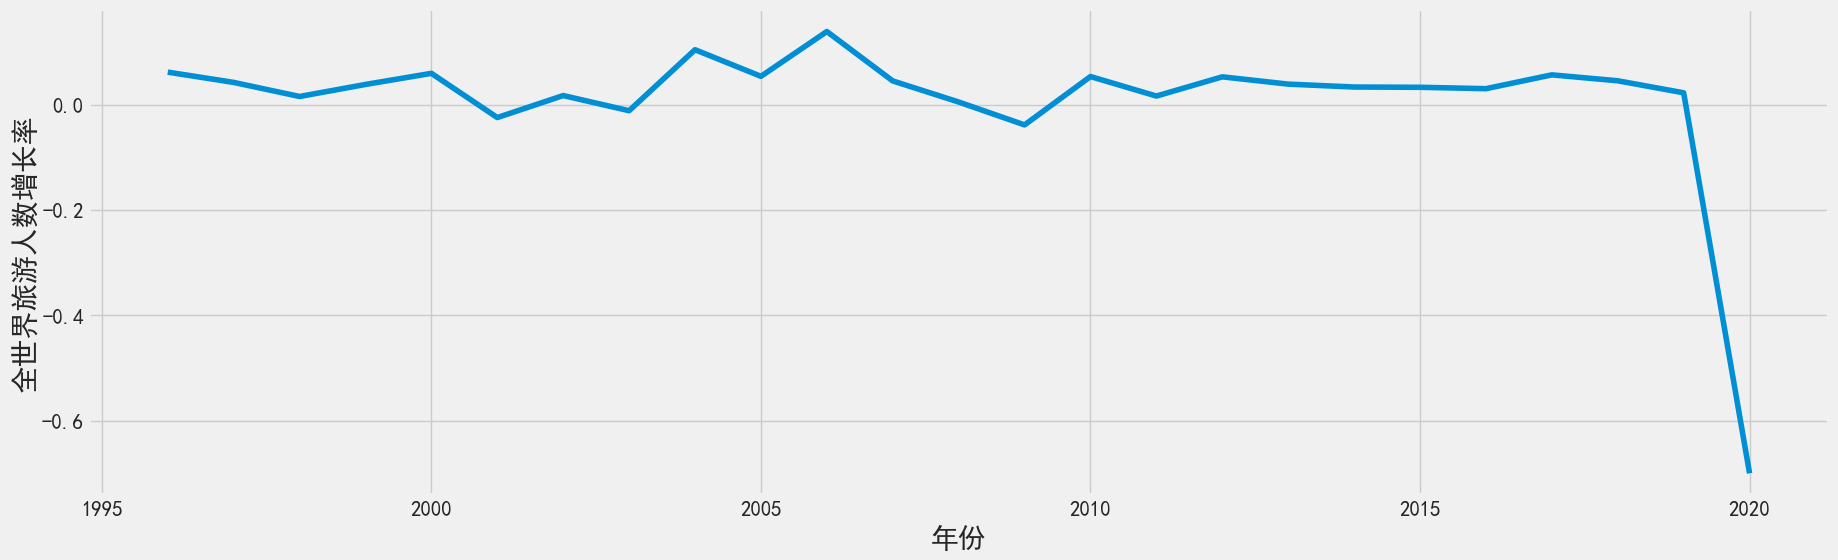

In [210]:
"""
计算全世界的旅游人数,并绘制折线图
"""
# 对data_RJ进行求和
data = data_RJ.sum(axis=1)
# 绘制折线图
plt.figure(figsize=(20,6))
sns.lineplot(x=data.index,y=data.values)
plt.xlabel('年份',fontdict={'size':20})
plt.ylabel('全世界旅游人数',fontdict={'size':20})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()
